In [1]:
import pandas as pd
import os

In [22]:
finance_datas = pd.read_csv('data/data_preprocessing_unified_including_others.csv', sep=',', encoding='utf-8', dtype={'종목코드':str, '분기':int})

finance_datas

,종목코드,분기,배당금지급,유동자산,유동부채,영업이익(손실),수익(매출액),당기순이익(손실),자본총계,자산총계,...,ATR,MARKETCAP,TSF_SLOPE,배당수익률,AltmanZScore,순이익률,자본회전율,PER,PSR,PBR
0,000020,1,4.982243e+09,2.356569e+11,8.182557e+10,1.218255e+10,9.941981e+10,1.293368e+10,3.869576e+11,4.769903e+11,...,0.017,2.321105e+11,-0.127,0.021465,2.672581,0.130092,0.256927,17.946209,2.334651,0.599835
1,000020,2,4.982243e+09,2.316660e+11,7.726278e+10,5.464701e+09,8.999036e+10,2.051404e+10,3.945880e+11,4.817560e+11,...,0.027,2.902080e+11,0.354,0.017168,3.023391,0.227958,0.228062,14.146794,3.224878,0.735471
2,000020,3,4.982243e+09,2.345890e+11,7.876748e+10,2.694848e+09,8.745741e+10,6.157136e+09,4.007350e+11,4.901510e+11,...,0.028,2.737284e+11,-0.024,0.018201,2.832657,0.070402,0.218243,44.457101,3.129848,0.683066
3,000220,2,2.001735e+09,1.002660e+11,4.948049e+10,-3.801753e+08,3.421640e+10,-2.717080e+09,1.230820e+11,2.005860e+11,...,0.027,8.584303e+10,-0.188,0.023319,1.774075,-0.079409,0.277997,-31.593851,2.508827,0.697446
4,000220,3,2.001735e+09,9.409481e+10,4.727321e+10,-1.510527e+09,3.409087e+10,-2.275938e+09,1.207970e+11,1.965830e+11,...,0.031,7.724171e+10,-0.071,0.025915,1.670630,-0.066761,0.282216,-33.938408,2.265759,0.639435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,900070,1,0.000000e+00,5.619339e+08,1.435437e+08,6.542623e+06,1.534348e+08,1.255343e+06,6.280200e+08,8.338091e+08,...,0.025,3.735206e+10,-0.064,0.000000,110.163543,0.008182,0.244315,29754.463779,243.439357,59.475908
638,900070,2,4.103465e+06,5.786784e+08,1.413904e+08,7.373644e+06,1.502561e+08,1.696553e+07,6.521951e+08,8.565471e+08,...,0.056,4.407006e+10,0.117,0.000093,130.640149,0.112911,0.230385,2597.623386,293.299687,67.571905
639,900070,3,4.103465e+06,5.672710e+08,1.290003e+08,9.139425e+06,1.489769e+08,4.868978e+06,6.494237e+08,8.367302e+08,...,0.040,3.342875e+10,-0.169,0.000123,108.326015,0.032683,0.229399,6865.660103,224.388821,51.474478
640,950130,2,2.275586e+07,4.193563e+08,3.896446e+07,9.368300e+05,5.022495e+07,1.237934e+07,4.687991e+08,5.555589e+08,...,0.035,2.880174e+11,-0.191,0.000079,1992.925982,0.246478,0.107135,23265.977417,5734.548463,614.372714


In [93]:
def remove_outliers(df, threshold=1.5):
    """
    이상치를 제거하는 함수.
    
    Parameters:
    df (DataFrame): 이상치를 제거할 데이터프레임.
    columns (list): 이상치를 제거할 열의 리스트.
    threshold (float): 이상치를 식별하는 데 사용되는 표준편차의 배수. 기본값은 1.5.
    
    Returns:
    DataFrame: 이상치가 제거된 데이터프레임.
    """
    df_out = df.copy()
    for col in df.columns:
        # 이상치 식별을 위해 IQR 계산
        q1 = df_out[col].quantile(0.25)
        q3 = df_out[col].quantile(0.75)
        iqr = q3 - q1
        # 이상치 경계 계산
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        # 이상치 제거
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out


def apply_standard_scaler(df):
    SS = StandardScaler()
    return pd.DataFrame(SS.fit_transform(df), columns=df.columns)

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 모멘텀지표 분석
X_train = finance_datas[['TSF_SLOPE', '배당수익률', '순이익률', '자본회전율']] # 'AltmanZScore' 제외 (수치 이상)
X_train = pd.DataFrame(X_train)

# 이상치 제거
X_train = remove_outliers(X_train)

# 정규분포 스케일링 적용
#SS = StandardScaler()
#X_train = apply_standard_scaler(X_train)

print(X_train)

     TSF_SLOPE     배당수익률      순이익률     자본회전율
0       -0.127  0.021465  0.130092  0.256927
1        0.354  0.017168  0.227958  0.228062
2       -0.024  0.018201  0.070402  0.218243
3       -0.188  0.023319 -0.079409  0.277997
4       -0.071  0.025915 -0.066761  0.282216
..         ...       ...       ...       ...
636     -0.301  0.010188  0.189193  0.143856
637     -0.064  0.000000  0.008182  0.244315
638      0.117  0.000093  0.112911  0.230385
639     -0.169  0.000123  0.032683  0.229399
640     -0.191  0.000079  0.246478  0.107135

[494 rows x 4 columns]


In [95]:
X_train.corr()

,TSF_SLOPE,배당수익률,순이익률,자본회전율
TSF_SLOPE,1.000000,-0.049982,0.111911,0.067898
배당수익률,-0.049982,1.000000,0.050159,0.023733
순이익률,0.111911,0.050159,1.000000,-0.183961
자본회전율,0.067898,0.023733,-0.183961,1.000000


C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


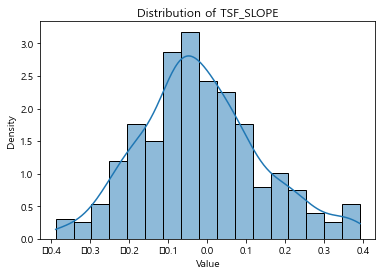

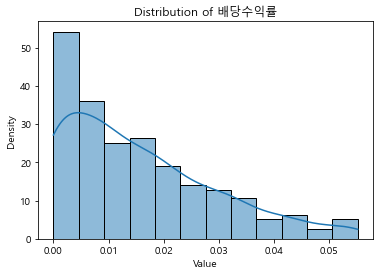

C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


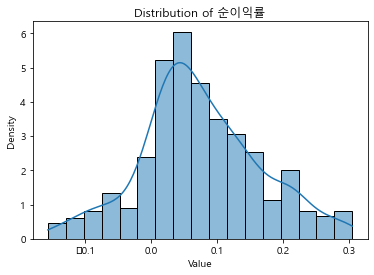

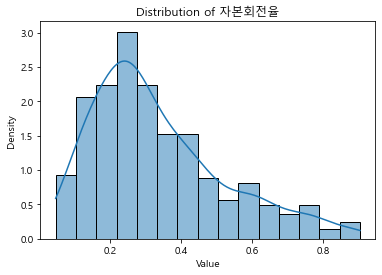

In [96]:
# 각 열에 대한 분포 표현
for col in X_train.columns:
    sns.histplot(X_train[col], kde=True, stat='density')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


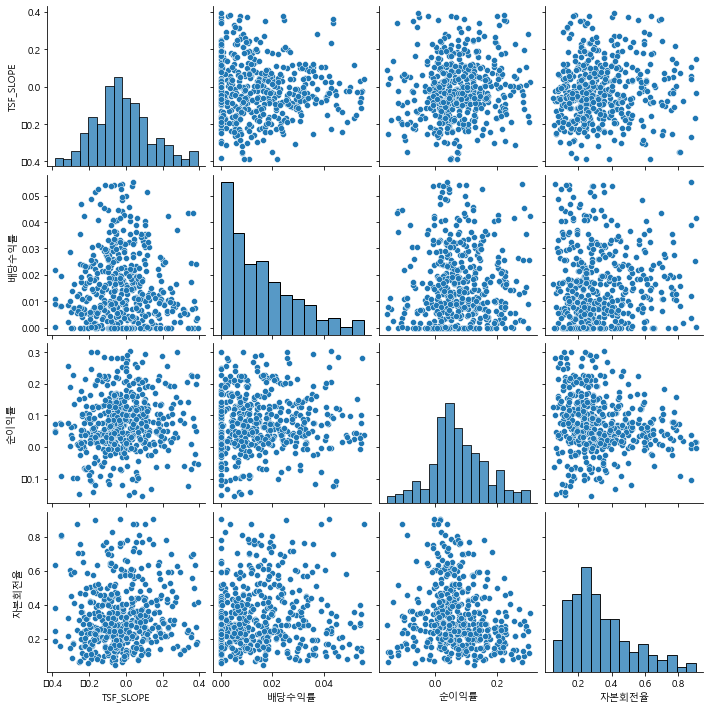

In [42]:
sns.pairplot(X_train)
plt.show()

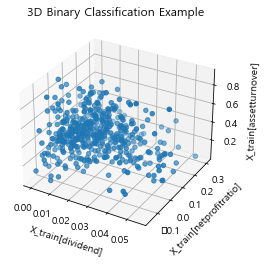

In [43]:
# 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 포인트를 3D 공간에 점으로 표시
ax.scatter(X_train['배당수익률'], X_train['순이익률'], X_train['자본회전율'], marker='o')

# 그래프에 제목과 레이블 추가
ax.set_title('3D Graph Plot')
ax.set_xlabel('X_train[DividendRatio]')
ax.set_ylabel('X_train[NetProfitMargin]')
ax.set_zlabel('X_train[AssetTurnOver]')

# 그래프 표시
plt.show()

C:\Users\devtae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


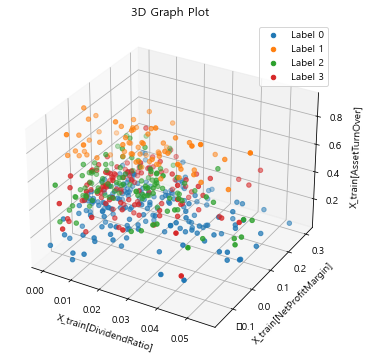

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# KMeans 군집화 수행 (군집 3개에 대한 분석)
n_clusters=4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train)

# 각 군집에 대해 새로운 레이블 할당
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(X_train_kmeans)

# 3차원 플롯 설정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 각 레이블에 따라 다른 색으로 플롯
for label in range(0, n_clusters):
    indices = (y_train == label)
    ax.scatter(X_train.loc[indices, '배당수익률'], X_train.loc[indices, '순이익률'], X_train.loc[indices, '자본회전율'], label=f'Label {label}')

# 그래프에 제목과 레이블 추가
ax.set_title('3D Graph Plot')
ax.set_xlabel('X_train[DividendRatio]')
ax.set_ylabel('X_train[NetProfitMargin]')
ax.set_zlabel('X_train[AssetTurnOver]')

# 범례 표시
ax.legend()

# 플롯 표시
plt.show()

In [101]:
# 클러스터링된 데이터 분포 확인을 위한 데이터프레임 생성

filtered = ['배당수익률', '순이익률', '자본회전율']
clustered_datas = X_train[filtered]
clustered_datas = pd.DataFrame(clustered_datas, columns=filtered)
clustered_datas['label'] = y_train

print(clustered_datas)

        배당수익률      순이익률     자본회전율  label
0    0.021465  0.130092  0.256927      0
1    0.017168  0.227958  0.228062      3
2    0.018201  0.070402  0.218243      0
3    0.023319 -0.079409  0.277997      2
4    0.025915 -0.066761  0.282216      2
..        ...       ...       ...    ...
636  0.010188  0.189193  0.143856      0
637  0.000000  0.008182  0.244315      0
638  0.000093  0.112911  0.230385      3
639  0.000123  0.032683  0.229399      0
640  0.000079  0.246478  0.107135      0

[494 rows x 4 columns]


C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\devtae\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


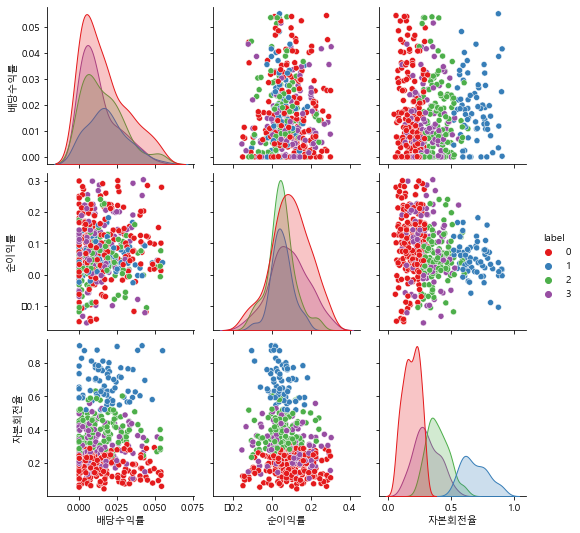

In [102]:
sns.pairplot(clustered_datas, hue='label', palette='Set1')

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

atrpp_data = pd.read_csv(r"data\data_preprocessing_unified.csv", encoding= 'utf-8')

atrpp_data = pd.DataFrame(data= atrpp_data, columns=['종목코드', '분기', 'ATR'])

atrpp_data_1 = atrpp_data.loc[atrpp_data['분기'] == 1]
atrpp_data_1['ATR'] = atrpp_data_1['ATR']*10000

display(atrpp_data_1)

SS = StandardScaler()
X_train = pd.DataFrame(SS.fit_transform(atrpp_data_1), columns=atrpp_data_1.columns)
print(X_train)


print(X_train['ATR'])

Kmeans = KMeans(n_clusters=2, random_state=0)

clusters = Kmeans.fit(np.array(X_train['ATR']).reshape(-1, 1))

atrpp_data_1['cluster'] = clusters.labels_
atrpp_data_1

C:\Users\devtae\AppData\Local\Temp/ipykernel_1940928/7291455.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atrpp_data_1['ATR'] = atrpp_data_1['ATR']*10000


,종목코드,분기,ATR
0,20,1.0,170.0
6,250,1.0,570.0
12,950,1.0,390.0
19,1790,1.0,260.0
30,2450,1.0,170.0
...,...,...,...
577,234300,1.0,400.0
588,245620,1.0,370.0
610,319660,1.0,430.0
616,333620,1.0,390.0


C:\Users\devtae\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


         종목코드   분기       ATR
0   -0.742310  0.0 -1.587313
1   -0.740196  0.0  1.873423
2   -0.733761  0.0  0.316092
3   -0.726039  0.0 -0.808647
4   -0.719971  0.0 -1.587313
..        ...  ...       ...
96   1.411402  0.0  0.402610
97   1.515465  0.0  0.143055
98   2.196107  0.0  0.662166
99   2.324440  0.0  0.316092
100  7.531756  0.0 -0.895166

[101 rows x 3 columns]
0     -1.587313
1      1.873423
2      0.316092
3     -0.808647
4     -1.587313
         ...   
96     0.402610
97     0.143055
98     0.662166
99     0.316092
100   -0.895166
Name: ATR, Length: 101, dtype: float64


C:\Users\devtae\AppData\Local\Temp/ipykernel_1940928/7291455.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atrpp_data_1['cluster'] = clusters.labels_


,종목코드,분기,ATR,cluster
0,20,1.0,170.0,0
6,250,1.0,570.0,1
12,950,1.0,390.0,1
19,1790,1.0,260.0,0
30,2450,1.0,170.0,0
...,...,...,...,...
577,234300,1.0,400.0,1
588,245620,1.0,370.0,0
610,319660,1.0,430.0,1
616,333620,1.0,390.0,1
